In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Data loaded. Shape: (200, 5)

First few rows:
   customer_id  gender  age  purchase  spending
0            1    Male   19        15        39
1            2    Male   21        15        81
2            3  Female   20        16         6
3            4  Female   23        16        77
4            5  Female   31        17        40

Cluster 0:
  Number of customers: 57
  Average customer_id: 69.47
  Average purchase: 47.95
  Average spending: 41.89
  Average age: 55.54

Cluster 1:
  Number of customers: 40
  Average customer_id: 161.03
  Average purchase: 86.10
  Average spending: 81.53
  Average age: 32.88

Cluster 2:
  Number of customers: 25
  Average customer_id: 22.32
  Average purchase: 25.48
  Average spending: 75.44
  Average age: 25.48

Cluster 3:
  Number of customers: 36
  Average customer_id: 163.83
  Average purchase: 87.89
  Average spending: 17.92
  Average age: 41.31

Cluster 4:
  Number of customers: 42
  Average customer_id: 77.21
  Average purchase: 50.81
  Average s

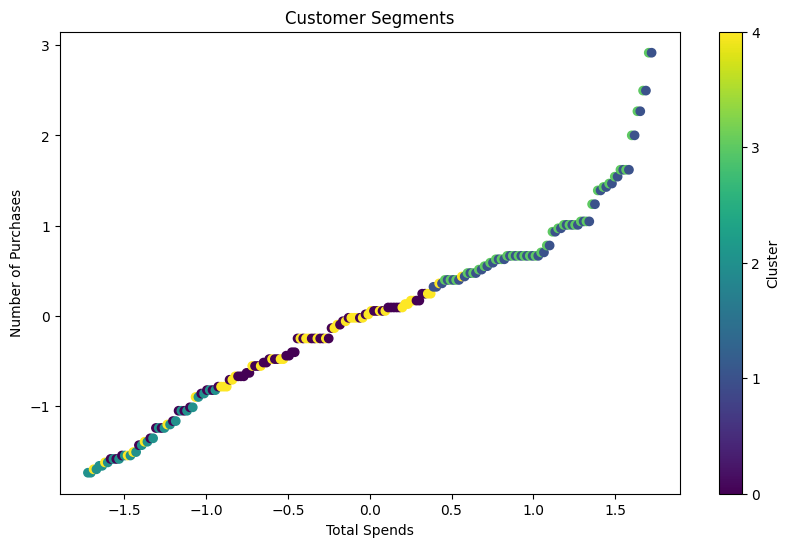

In [6]:
data = pd.read_csv('Mall Customers.csv')
print("Data loaded. Shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

features = ['customer_id', 'purchase', 'spending', 'age']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=58)
data['Cluster'] = kmeans.fit_predict(X_scaled)

for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Number of customers: {len(cluster_data)}")
    for feature in features:
        print(f"  Average {feature}: {cluster_data[feature].mean():.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Total Spends')
plt.ylabel('Number of Purchases')
plt.title('Customer Segments')
plt.colorbar(ticks=range(n_clusters), label='Cluster')
plt.show()